In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import logging

import yaml
import numpy as np
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt

from alr_sim.core.Scene import Scene

from alr_simulation_tools.ycb_utils import YCBLoader
from alr_simulation_tools.scene_utils import create_sample_data

logging.basicConfig(level=logging.INFO)

pybullet build time: Oct 28 2022 16:11:27


In [2]:
config = {
    "factory_string": "mj_beta",
    "object_pos": (0.5, 0.0, 0.2),
    "adhust_object_position": True,
    "cam_pos": (1.2, 0.0, 1),
    # "cam_quat": R.from_euler("xyz", (0, 0, -90), degrees=True).as_quat()[
    #         [3, 0, 1, 2]
    #     ].tolist(),
    # "cam_quat": R.from_euler("zyx", (-90, -30, 0), degrees=True).as_quat()[
    #         [3, 0, 1, 2]
    #     ].tolist(),
    "cam_quat": R.from_euler("zyx", (90, 50, 0), degrees=True).as_quat()[
            [3, 0, 1, 2]
        ].tolist(),
    "cam_height": 480,
    "cam_width": 640,
    "robot_pos": (0.0, 0.5, 0.2),
    "robot_quat": (0,1,0,0),
    "render_mode": Scene.RenderMode.BLIND,
    "wait_time": 0.5,
    "move_duration": 2,
}

In [3]:
destination_path = Path.home() / "Documents" / "ycb_sim_data_4"
destination_path.mkdir(parents=True, exist_ok=True)

In [4]:
with open(destination_path / "config.yaml", "w") as f:
    yaml.dump(config, f, sort_keys=False)

In [5]:
ycb_loader = YCBLoader(
    ycb_base_folder=Path.home() / "Documents" / "ycb",
    factory_string=config["factory_string"],
)

INFO:root:Skipping broken object 001_chips_can
INFO:root:Creating sample data for 002_master_chef_can


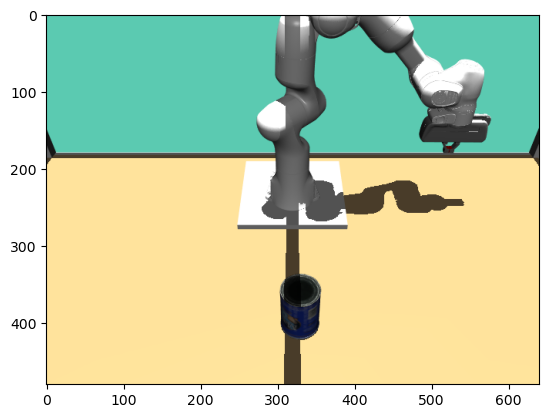

INFO:root:Creating sample data for 003_cracker_box


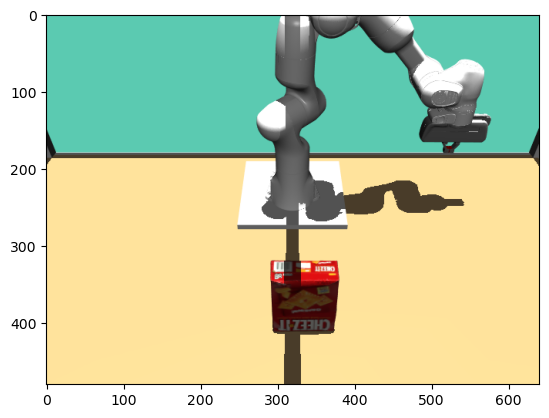

INFO:root:Creating sample data for 004_sugar_box


KeyboardInterrupt: 

In [6]:
for i in range(len(ycb_loader)):
# for i in [2]:
    if ycb_loader.is_broken(i):
        logging.info(f"Skipping broken object {ycb_loader.get_obj_name(i)}")
        continue

    logging.info(f"Creating sample data for {ycb_loader.get_obj_name(i)}")

    sim_obj, name = ycb_loader.get_ycb_object(
        index=i, adjust_object_position=config["adhust_object_position"], pos=config["object_pos"]
    )

    result = create_sample_data(
        factory_string=config["factory_string"],
        cam_pos=config["cam_pos"],
        cam_quat=config["cam_quat"],
        cam_height=config["cam_height"],
        cam_width=config["cam_width"],
        robot_pos=config["robot_pos"],
        robot_quat=config["robot_quat"],
        object_list=[sim_obj],
        target_obj_name=name,
        render_mode=config["render_mode"],
        wait_time=config["wait_time"],
        move_duration=config["move_duration"],
    )

    if i < 3:
        plt.imshow(result["rgb_img"])
        plt.show()
        
    # np.savez(
    #     destination_path / f"{i:03}_{name}.npz",
    #     **result,
    # )
